## Tiny ImageNet Case Study

In [1]:
## Importing the necessary libraries 
import torch
from utils import *
from paths import *
from train import *
import shutil
from torchvision.utils import make_grid
from model import *
import copy 




#If cuda is avaliable we will use the cuda
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

### Organizing data

In [2]:
# Initialize an empty dictionary to store the id --> name of class

labels_dict = {}
# Open the text file
with open(DATA_PATH + '/words.txt', 'r') as file:
    # Read each line
    for line in file:
        # Split the line by tab character
        parts = line.strip().split('\t')
        identifier, label = parts
        labels_dict[identifier] = label

In [3]:
# Define the path to the "train" folder
train_folder_path = TRAIN_PATH
# Get a list of all directories inside the "train" folder
folder_names = [name for name in os.listdir(train_folder_path) if os.path.isdir(os.path.join(train_folder_path, name))]


In [4]:
## For the same organization with train ı orginize the validation folder
# Open the text file
with open(VALID_PATH + '/val_annotations.txt', 'r') as file:
    # Read each line
    for line in file:
        # Split the line by tab character
        parts = line.strip().split('\t')
        name_file, label = parts[:2]
        dest = VALID_PATH + "/images2/" + label  ##inside the iamge2 directory ı makedirs per class
        source = VALID_PATH + "/images/" + name_file
        if not(check_folder_existence(dest)): # if the class_name directory not exist,create 
            os.makedirs(dest)
            print("Creating..", dest)
        if not(check_folder_existence(dest + "/" + name_file)): #copying the images to class dir.
            shutil.copy(source, dest)
            print("source:",source,"destination:",dest)
    
    print("Everything ready")    #If the dirs aldready created everything ready!!


Everything ready


### Dataloader

In [5]:
batch_size = 32   ##hyperparameter we can adjust it later...

transform = transforms.Compose([
    transforms.ToTensor(),         # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize image data
])

#creating the dataloader
train_dataloader = dataloader_create(data=TRAIN_PATH,name="train",transform=transform,gpu_enable=use_cuda,batch_size=batch_size)
valid_dataloader = dataloader_create(data=VALID_PATH_2,name="valid",transform=transform,gpu_enable=use_cuda,batch_size=batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


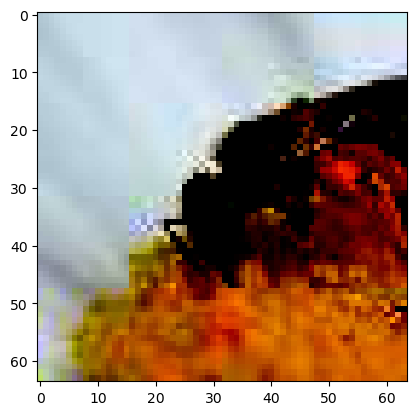

Label: 38
name of the image: bee


In [10]:
label,_ = show_image(valid_dataloader)

print("name of the image:", labels_dict[folder_names[label]])

### Defining model

In [ ]:
##This block just control the created model and it's output dimension
# Create an instance of the network
net = TinyNet()

# Generate a random input tensor with dimensions (3, 64, 64)
input_tensor = torch.randn(64, 3, 64, 64)

# Forward pass to get the output tensor
output_tensor = net(input_tensor)

# Print the output tensor shape
print("Output tensor shape:", output_tensor.shape)

Output tensor shape: torch.Size([64, 200])


In [ ]:
model = net.to(device)
print(model)

TinyNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fa

### Training

Below the this part ı will iterate the training procedure regarding the result of accuracy and loss plots for validation and trainings set.

#### First version of training 

In [ ]:
##Hyper parameters we will tune regarding to our loss curves
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_loss_,val_loss_,val_accuracy_,model = training_loop(epochs=50,train_dataloader=train_dataloader,valid_dataloader=valid_dataloader,
                model=model,loss_fn=loss_fn,optimizer=optimizer,batch_size=batch_size)



Epoch 1
-----------
Current loss: 5.275039  [   32/100000]
Current loss: 5.317589  [ 3232/100000]
Current loss: 5.329363  [ 6432/100000]
Current loss: 5.336679  [ 9632/100000]
Current loss: 5.237738  [12832/100000]
Current loss: 5.242555  [16032/100000]
Current loss: 5.183582  [19232/100000]
Current loss: 5.276216  [22432/100000]
Current loss: 5.298454  [25632/100000]
Current loss: 5.282446  [28832/100000]
Current loss: 5.235771  [32032/100000]
Current loss: 5.129512  [35232/100000]
Current loss: 5.178053  [38432/100000]
Current loss: 5.151453  [41632/100000]
Current loss: 5.149562  [44832/100000]
Current loss: 5.202560  [48032/100000]
Current loss: 5.202071  [51232/100000]
Current loss: 5.143632  [54432/100000]
Current loss: 5.202812  [57632/100000]
Current loss: 5.080297  [60832/100000]
Current loss: 5.046576  [64032/100000]
Current loss: 5.214310  [67232/100000]
Current loss: 5.202844  [70432/100000]
Current loss: 5.030773  [73632/100000]
Current loss: 5.101115  [76832/100000]
Curre

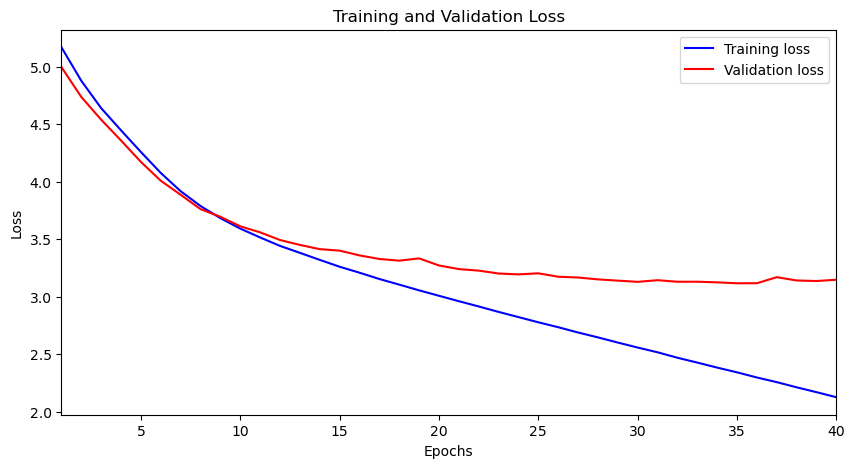

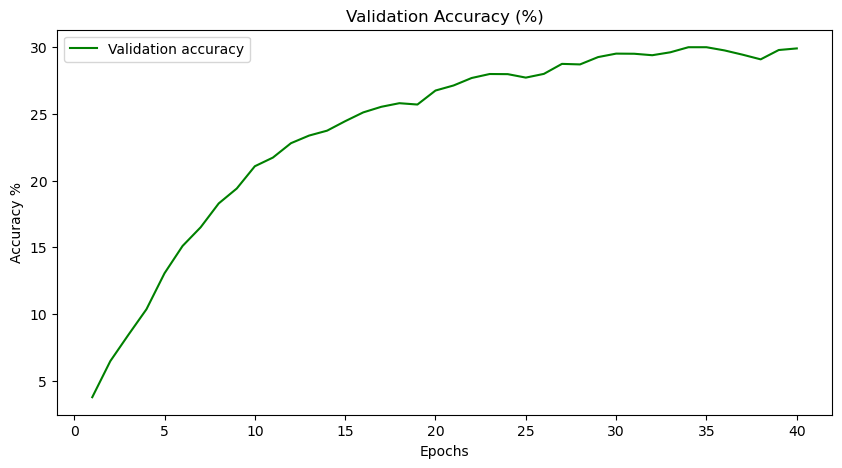

In [ ]:
plot_training_and_validation(train_loss_,val_loss_,val_accuracy_)

To overcome overfitting, I will introduce "L2 regularization" to the weights, and I will "augment" the data.

#### Second version of training

In [ ]:
net = TinyNet()
model = net.to(device)

In [ ]:
preprocess_transform_pretrain = T.Compose([
        T.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        T.ToTensor(),  # Converting cropped images to tensors
        T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize image data
])

train_dataloader = dataloader_create(data=TRAIN_PATH,name="train",transform=preprocess_transform_pretrain,gpu_enable=use_cuda,batch_size=batch_size)
valid_dataloader = dataloader_create(data=VALID_PATH_2,name="valid",transform=transform,gpu_enable=use_cuda,batch_size=batch_size)

In [ ]:
##Hyper parameters we will tune regarding to our loss curves
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

train_loss_,val_loss_,val_accuracy_,model = training_loop(epochs=50,train_dataloader=train_dataloader,valid_dataloader=valid_dataloader,
                model=model,loss_fn=loss_fn,optimizer=optimizer,batch_size=batch_size)

Epoch 1
-----------
Current loss: 5.362362  [   32/100000]
Current loss: 5.312121  [ 3232/100000]
Current loss: 5.134556  [ 6432/100000]
Current loss: 5.209099  [ 9632/100000]
Current loss: 5.260756  [12832/100000]
Current loss: 5.064965  [16032/100000]
Current loss: 5.090301  [19232/100000]
Current loss: 4.721162  [22432/100000]
Current loss: 4.974985  [25632/100000]
Current loss: 4.739258  [28832/100000]
Current loss: 5.052693  [32032/100000]
Current loss: 4.779500  [35232/100000]
Current loss: 4.483608  [38432/100000]
Current loss: 4.577541  [41632/100000]
Current loss: 4.740705  [44832/100000]
Current loss: 4.617527  [48032/100000]
Current loss: 4.463448  [51232/100000]
Current loss: 4.309420  [54432/100000]
Current loss: 4.571815  [57632/100000]
Current loss: 4.447770  [60832/100000]
Current loss: 4.610913  [64032/100000]
Current loss: 4.244523  [67232/100000]
Current loss: 4.367561  [70432/100000]
Current loss: 4.490378  [73632/100000]
Current loss: 4.146327  [76832/100000]
Curre

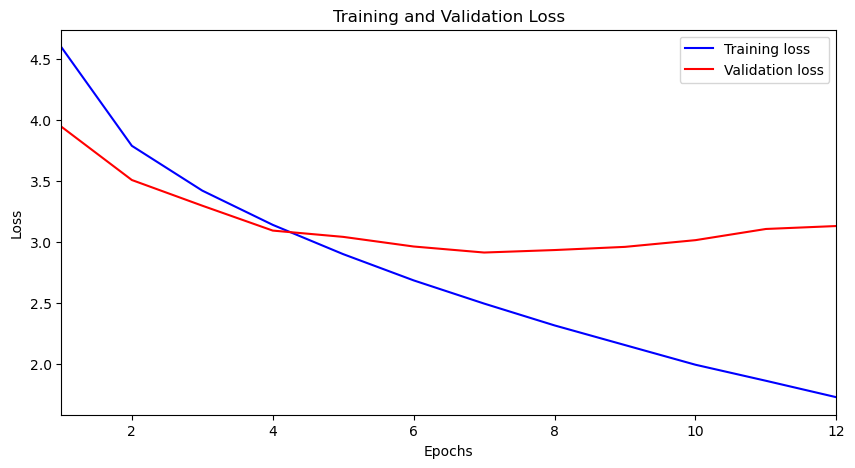

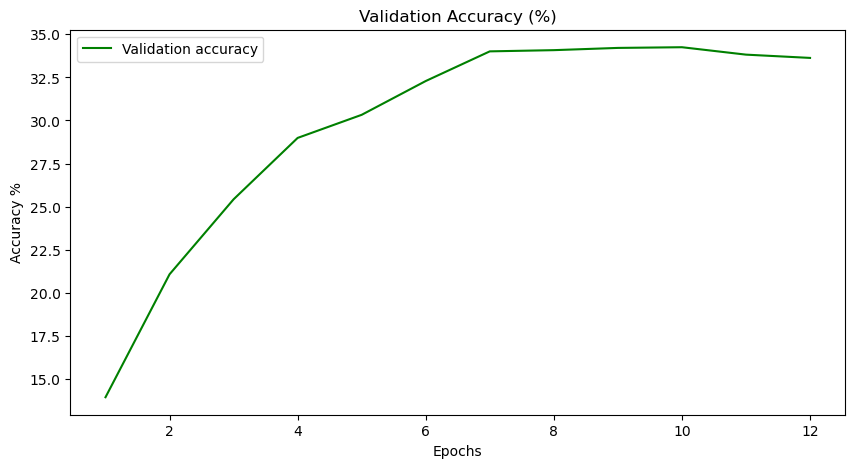

In [ ]:
plot_training_and_validation(train_loss_,val_loss_,val_accuracy_)

Still overfit exists ,i will modify the model to include a dropout layer to mitigate overfitting.

#### The third version of the training

In [ ]:
model2 = TinyNet_drop()
model2 = model2.to(device)
print(model2)

TinyNet_drop(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mo

In [ ]:
##Hyper parameters we will tune regarding to our loss curves
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate, weight_decay=1e-5)

train_loss_,val_loss_,val_accuracy_,model = training_loop(epochs=50,train_dataloader=train_dataloader,valid_dataloader=valid_dataloader,
                model=model2,loss_fn=loss_fn,optimizer=optimizer,batch_size=batch_size)

Epoch 1
-----------
Current loss: 5.233327  [   32/100000]
Current loss: 5.303319  [ 3232/100000]
Current loss: 5.210761  [ 6432/100000]
Current loss: 5.408293  [ 9632/100000]
Current loss: 5.171662  [12832/100000]
Current loss: 5.156887  [16032/100000]
Current loss: 5.068487  [19232/100000]
Current loss: 4.777270  [22432/100000]
Current loss: 5.416908  [25632/100000]
Current loss: 4.615043  [28832/100000]
Current loss: 4.642950  [32032/100000]
Current loss: 5.037467  [35232/100000]
Current loss: 4.854250  [38432/100000]
Current loss: 4.673504  [41632/100000]
Current loss: 4.097423  [44832/100000]
Current loss: 4.610012  [48032/100000]
Current loss: 4.669250  [51232/100000]
Current loss: 4.699327  [54432/100000]
Current loss: 4.569993  [57632/100000]
Current loss: 4.802337  [60832/100000]
Current loss: 4.418283  [64032/100000]
Current loss: 4.217965  [67232/100000]
Current loss: 4.285995  [70432/100000]
Current loss: 4.345591  [73632/100000]
Current loss: 4.536870  [76832/100000]
Curre

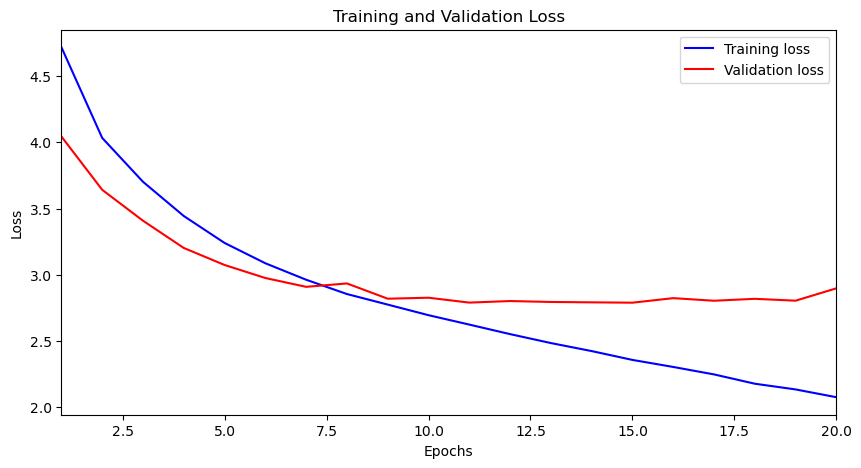

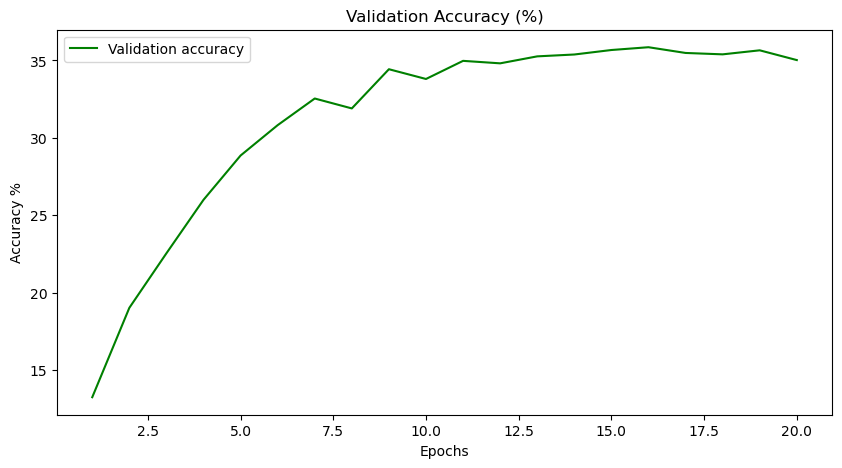

In [ ]:
plot_training_and_validation(train_loss_,val_loss_,val_accuracy_)

#### The fourth version of training

To increase the network's capacity, I introduced a new convolutional layer. 
To solve the gradient vanishing problem in early layers, I added a residual connection between layers 4 and 6 so that the information from the third layer is propagated to the sixth layer.

In [ ]:
model3 = TinyNet_drop_residual()
model3 = model3.to(device) 

In [ ]:
##Hyper parameters we will tune regarding to our loss curves
learning_rate = 0.0001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate, weight_decay=1e-3)

train_loss_,val_loss_,val_accuracy_,model = training_loop(epochs=50,train_dataloader=train_dataloader,valid_dataloader=valid_dataloader,
                model=model3,loss_fn=loss_fn,optimizer=optimizer,batch_size=batch_size)

Epoch 1
-----------
Current loss: 5.334359  [   32/100000]
Current loss: 5.303838  [ 3232/100000]
Current loss: 5.247938  [ 6432/100000]
Current loss: 5.282076  [ 9632/100000]
Current loss: 5.334795  [12832/100000]
Current loss: 5.173487  [16032/100000]
Current loss: 4.956317  [19232/100000]
Current loss: 4.903531  [22432/100000]
Current loss: 4.751561  [25632/100000]
Current loss: 4.935997  [28832/100000]
Current loss: 4.781946  [32032/100000]
Current loss: 4.704421  [35232/100000]
Current loss: 4.704516  [38432/100000]
Current loss: 4.738635  [41632/100000]
Current loss: 4.586709  [44832/100000]
Current loss: 4.535974  [48032/100000]
Current loss: 4.457738  [51232/100000]
Current loss: 5.050776  [54432/100000]
Current loss: 4.084365  [57632/100000]
Current loss: 4.542660  [60832/100000]
Current loss: 4.593277  [64032/100000]
Current loss: 4.345913  [67232/100000]
Current loss: 4.032494  [70432/100000]
Current loss: 4.576718  [73632/100000]
Current loss: 4.190100  [76832/100000]
Curre

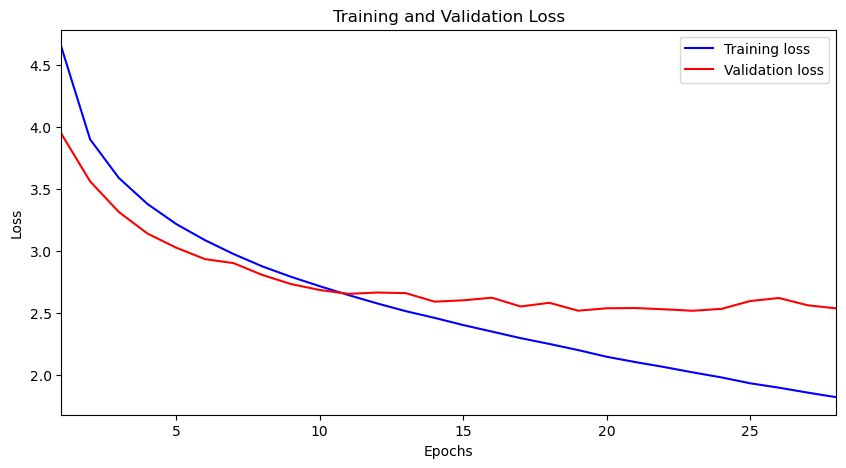

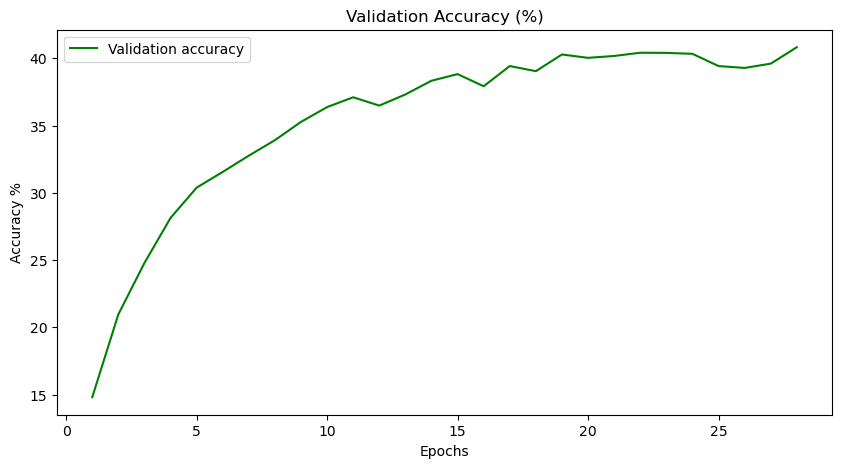

In [ ]:
plot_training_and_validation(train_loss_,val_loss_,val_accuracy_)

In [ ]:
##Little bit further training ı observe that the patience is not enough and it is stop earlier than ı expect.
learning_rate = 0.00001 ##for further training ı educe the learning rate
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate, weight_decay=1e-3)

train_loss_1,val_loss_1,val_accuracy_1,model = training_loop(epochs=50,train_dataloader=train_dataloader,valid_dataloader=valid_dataloader,
                model=model,loss_fn=loss_fn,optimizer=optimizer,batch_size=batch_size)

Epoch 1
-----------
Current loss: 2.145691  [   32/100000]
Current loss: 1.139470  [ 3232/100000]
Current loss: 1.270353  [ 6432/100000]
Current loss: 1.794989  [ 9632/100000]
Current loss: 1.970891  [12832/100000]
Current loss: 1.886621  [16032/100000]
Current loss: 1.432854  [19232/100000]
Current loss: 1.959570  [22432/100000]
Current loss: 1.596098  [25632/100000]
Current loss: 1.350866  [28832/100000]
Current loss: 1.726033  [32032/100000]
Current loss: 1.465454  [35232/100000]
Current loss: 1.374660  [38432/100000]
Current loss: 1.482202  [41632/100000]
Current loss: 1.239093  [44832/100000]
Current loss: 1.796985  [48032/100000]
Current loss: 1.896109  [51232/100000]
Current loss: 1.874094  [54432/100000]
Current loss: 1.673988  [57632/100000]
Current loss: 1.660151  [60832/100000]
Current loss: 1.539894  [64032/100000]
Current loss: 1.212165  [67232/100000]
Current loss: 1.415581  [70432/100000]
Current loss: 1.637054  [73632/100000]
Current loss: 1.501460  [76832/100000]
Curre

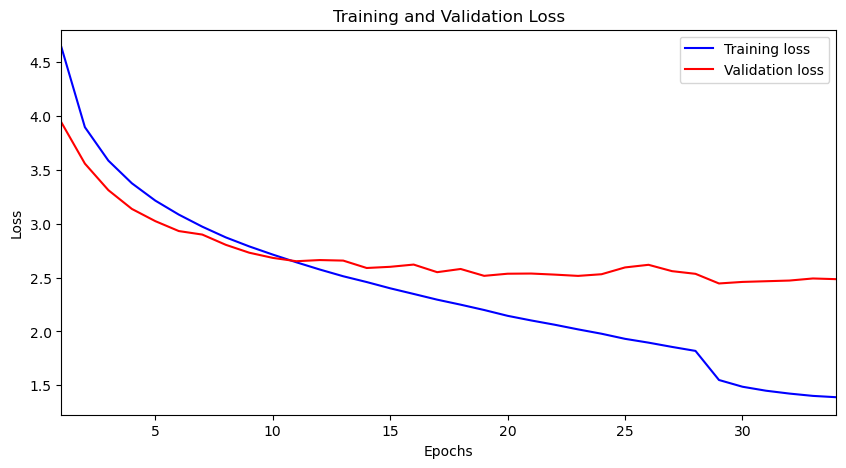

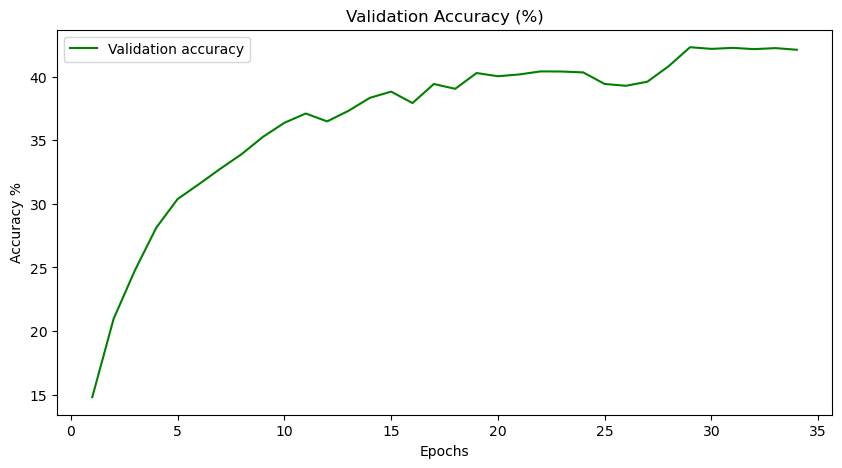

In [ ]:
plot_training_and_validation(train_loss_+train_loss_1,val_loss_+val_loss_1,val_accuracy_+val_accuracy_1)

In [ ]:
# Save the best model
torch.save(model.state_dict(), 'cnn_residual.pth')



<All keys matched successfully>

### Finetune RESNET 18

To compare with my residual network ı fine tune the RESNET18.

In [ ]:
model = torch.hub.load('pytorch/vision:v0.7.0', 'resnet18', pretrained=True)

Using cache found in C:\Users\asus/.cache\torch\hub\pytorch_vision_v0.7.0


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
Resnet18_200 = copy.deepcopy(model)

In [ ]:
for param in Resnet18_200.parameters():  ## ı freeze the all layer
    param.requires_grad = False

In [ ]:
Resnet18_200.fc = nn.Linear(in_features=512,out_features=200,bias=True) ## I just let the train the last layer of the RESNET18

In [ ]:
Resnet18_200 = Resnet18_200.to(device) ## transfer to the device cuda

In [ ]:
##Hyper parameters we will tune regarding to our loss curves
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(Resnet18_200.fc.parameters(), lr=learning_rate, weight_decay=1e-5)

train_loss_,val_loss_,val_accuracy_,model = training_loop(epochs=50,train_dataloader=train_dataloader,valid_dataloader=valid_dataloader,
                model=Resnet18_200,loss_fn=loss_fn,optimizer=optimizer,batch_size=batch_size)

Epoch 1
-----------
Current loss: 5.480648  [   32/100000]
Current loss: 4.251424  [ 3232/100000]
Current loss: 4.253506  [ 6432/100000]
Current loss: 4.674262  [ 9632/100000]
Current loss: 3.941820  [12832/100000]
Current loss: 3.818711  [16032/100000]
Current loss: 3.375676  [19232/100000]
Current loss: 4.264814  [22432/100000]
Current loss: 3.445524  [25632/100000]
Current loss: 3.279233  [28832/100000]
Current loss: 4.168505  [32032/100000]
Current loss: 3.630931  [35232/100000]
Current loss: 3.962054  [38432/100000]
Current loss: 3.681336  [41632/100000]
Current loss: 3.266086  [44832/100000]
Current loss: 3.226136  [48032/100000]
Current loss: 3.715336  [51232/100000]
Current loss: 3.801535  [54432/100000]
Current loss: 3.431183  [57632/100000]
Current loss: 2.899078  [60832/100000]
Current loss: 3.383099  [64032/100000]
Current loss: 3.987791  [67232/100000]
Current loss: 3.118987  [70432/100000]
Current loss: 2.946037  [73632/100000]
Current loss: 3.338020  [76832/100000]
Curre

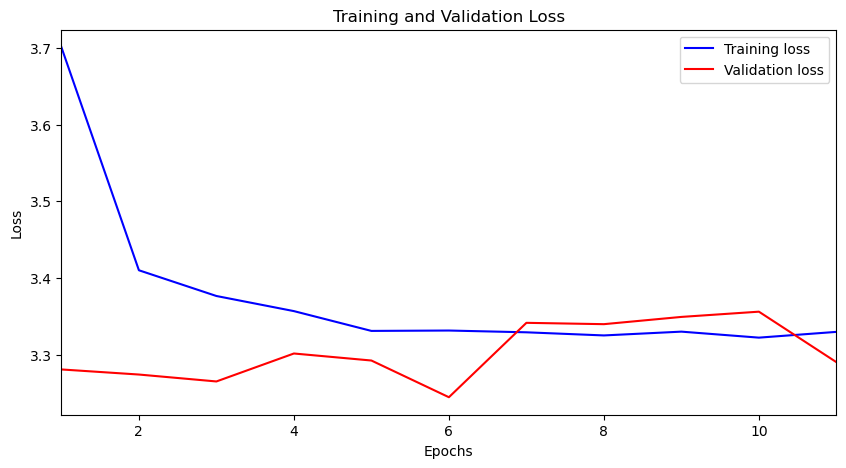

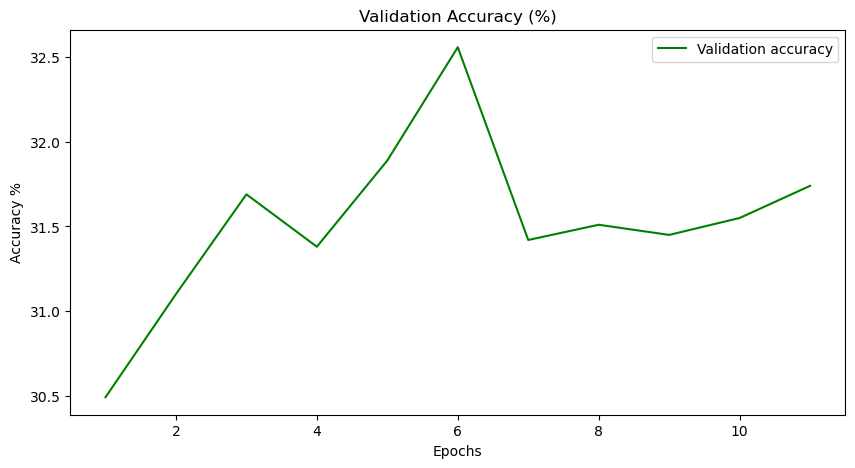

In [ ]:
plot_training_and_validation(train_loss_,val_loss_,val_accuracy_)

### Most accurated and inaccurated classes

To find the most accurate classified class and misclassified classes by inferring with the most accurate model we have trained so far.

In [7]:
##load the best model 

loaded_model = TinyNet_drop_residual()
loaded_model.load_state_dict(torch.load('cnn_residual.pth'))

<All keys matched successfully>

In [ ]:
batch_size = 50
loaded_model = loaded_model.to(device)
valid_dataloader = dataloader_create(data=VALID_PATH_2,name="test",transform=transform,gpu_enable=use_cuda,batch_size=batch_size)

In [30]:
good_finding_tensor = torch.tensor([])  # Initialize empty tensor
bad_finding_tensor = torch.tensor([])   # Initialize empty tensor

In [33]:
loaded_model.eval()
array = []
with torch.no_grad():
        for i, (X,y) in enumerate(valid_dataloader):
            X,y = X.to("cuda"), y.to("cuda")
            predictions = loaded_model(X)
            random_num = randint(0, len(X)-1)
            X = X.to("cpu")
            #imshow(make_grid(X))
            #print(y)
            #print(predictions.shape)
            tensor1 = torch.argmax(predictions, dim=1)
            #print(tensor1)
            same_value_count = torch.sum(tensor1 == y).item()
            array.append(same_value_count)
            if i in max_indices[:5]:
                good_finding_tensor = torch.cat((good_finding_tensor, X[1].unsqueeze(0)), dim=0)
            elif i in max_indices[195:200]:
                bad_finding_tensor = torch.cat((bad_finding_tensor, X[1].unsqueeze(0)), dim=0)
            else:
                pass
            

In [32]:
array_np = np.array(array)
max_indices = np.argsort(array_np)[::-1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


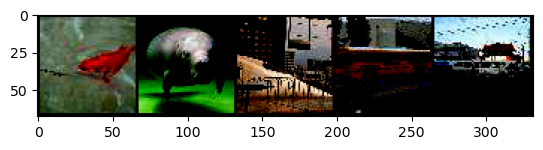

name of the image: goldfish, Carassius auratus accuracy 84.0 i: 0
name of the image: school bus accuracy 82.0 i: 145
name of the image: bullet train, bullet accuracy 78.0 i: 81
name of the image: trolleybus, trolley coach, trackless trolley accuracy 76.0 i: 166
name of the image: dugong, Dugong dugon accuracy 74.0 i: 23


In [34]:
imshow(make_grid(good_finding_tensor))
for i in max_indices[:5]:
    print("name of the image:", labels_dict[folder_names[i]], "accuracy", array_np[i]/50*100,"i:",i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


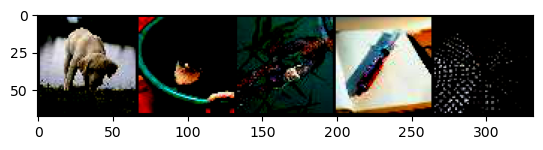

name of the image: umbrella accuracy 8.0
name of the image: syringe accuracy 8.0
name of the image: Labrador retriever accuracy 8.0
name of the image: bucket, pail accuracy 6.0
name of the image: chain accuracy 6.0


In [35]:
imshow(make_grid(bad_finding_tensor))
for i in max_indices[195:200]:
    print("name of the image:", labels_dict[folder_names[i]], "accuracy", array_np[i]/50*100)

### Inference with TEST DATA set

In [38]:
test_dataloader = dataloader_create(data=TEST_PATH,name="test",transform=transform,gpu_enable=use_cuda,batch_size=batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


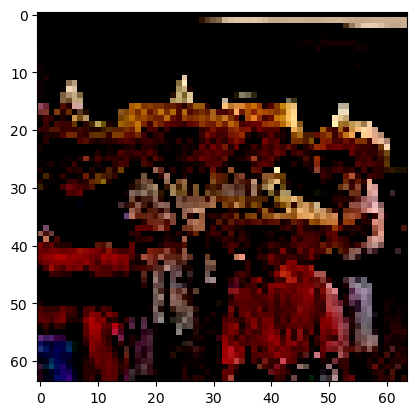

82
butcher shop, meat market


In [44]:
loaded_model.eval()
loaded_model = loaded_model.to(device)

with torch.no_grad():
        for X,y in test_dataloader:
            X,y = X.to("cuda"), y.to("cuda")
            predictions = loaded_model(X)
            random_num = randint(0, len(X)-1)
            imshow(X.to("cpu")[random_num])
            label = y[random_num]
            print( torch.argmax(predictions[random_num]).item())
            print(labels_dict[folder_names[ torch.argmax(predictions[random_num]).item()]])
            break
            